## Detailed Data Assessment
### Group 2
- Abhiroop Juttu - 0781192
- Abhinav Reddy Moddu - 0787883
- Twinkle Chowdary Pemmasani - 0782001
- Noorjahan Shaik - 0775162
- Srinath Kumar Toparapu - 0786927

In [33]:
from pathlib import Path
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from progressbar import ProgressBar
import warnings
warnings.filterwarnings('ignore')
from pandas_profiling import ProfileReport


progress = ProgressBar() 
def load_images_from_folder(folder):
    images = []
    for filename in progress(os.listdir(folder)):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
            
    img = np.array(images)
    del images
    return img


## Original Data

In [2]:
data_path=r'data\image\original'

In [3]:
import os

def get_filepaths(directory):
   
    file_paths = [] 
    
    for root, directories, files in os.walk(directory):
        for filename in files:
            filepath = os.path.join(filename)
            filepath=filepath[:-4]
            file_paths.append(filepath) 

    return file_paths  
  
#file_names = get_filepaths(data_path)
#print(len(file_names))
#file_names[0]



In [4]:
#file_names_split=list(map(lambda s: s.split("_"), file_names))
#file_names_split[0]    

In [29]:
#Create the pandas DataFrame
#df = pd.DataFrame(file_names_split, columns = ['File_no','Source','Catogery','Probe_Type','Frame_number'])
#print(df )
#df.to_csv("Covid_EDA.csv",index=False)
df = pd.read_csv("Covid_EDA.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18628 entries, 0 to 18627
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   File_no       18628 non-null  int64 
 1   Source        18628 non-null  object
 2   Catogery      18628 non-null  object
 3   Probe_Type    18628 non-null  object
 4   Frame_number  18628 non-null  object
dtypes: int64(1), object(4)
memory usage: 727.8+ KB


### Types of variables

There are total of 5 variables as the data label, which includes 1 integer datatype and 4 string datatypes

### Original Data Report

In [34]:
report = ProfileReport(df)

In [35]:
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df['Source'].unique()

array(['litfl', 'radio', 'core', 'uf', 'paper', 'clarius', 'grepmed',
       'pocusatlas'], dtype=object)

### Source Variable 

#### Unique
- There are total of 8 unique sources which includes ['litfl', 'radio', 'core', 'uf', 'paper', 'clarius', 'grepmed',
       'pocusatlas'].
- All the sources are in string format.
- Each source has various data contributions which are clearly shown in the below plot and above report.

#### Consistency
- Data contributions is very different for every source.
    - Value	        Count	Frequency (%)
    - grepmed	    3994	21.4%
    - paper	        3774	20.3%
    - core	        3098	16.6%
    - litfl	        2371	12.7%
    - uf	        2213	11.9%
    - pocusatlas	1745	9.4%
    - radio	        781	    4.2%
    - clarius	    652	    3.5%

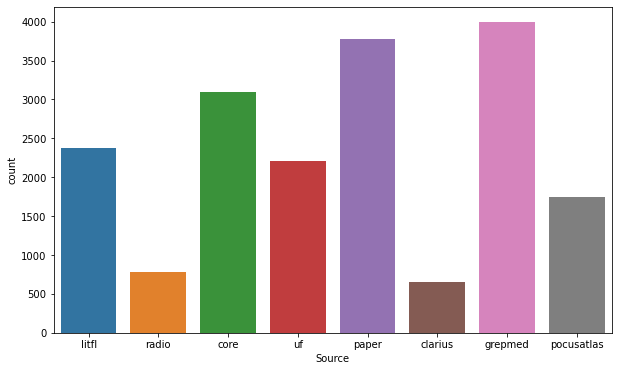

In [7]:
plt.rcParams["figure.figsize"] = (10,6)
sns.countplot(x ='Source', data = df)
plt.show()


In [8]:
df['Probe_Type'].unique()

array(['convex', 'linear'], dtype=object)

### Probe_Type Variable 

#### Unique
- There are total of 2 unique Probe types which includes ['convex', 'linear'].
- All the types are in string format.
- Each Probe type has various distributions which are clearly shown in the below plot and above report.

#### Consistency
- Data contributions is very different for every source.
    - Value	        Count
    - convex	14239 
    - linear	4389 

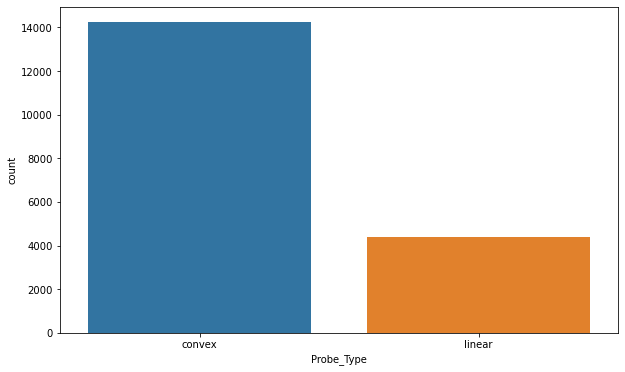

In [9]:
sns.countplot(x ='Probe_Type', data = df)
plt.show()

In [10]:
df['Catogery'].unique()

array(['other', 'pneumonia', 'normal', 'covid'], dtype=object)

### Category Variable 

#### Unique
- There are total of 4 unique Categories which includes ['other', 'pneumonia', 'normal', 'covid'].
- All the Categories are in string format.
- Each Category has various distributions which are clearly shown in the below plot and above report.
- There is slight imbalnce with the data labels.
- Labels with Pneumonia and Covid are quiet equal compared to Normal and other.


#### Consistency
- Data contributions is very different for every source.
    - Value	    Count	Frequency (%)
    - other	    7975	42.8%
    - pneumonia	4449	23.9%
    - covid	    4003	21.5%
    - normal	2201	11.8%

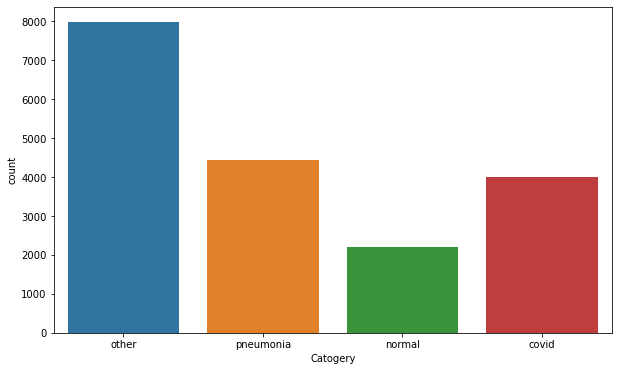

In [11]:
sns.countplot(x ='Catogery', data = df)
plt.show()

In [12]:
#org = load_images_from_folder('data\image\original')

100% (18628 of 18628) |##################| Elapsed Time: 0:02:08 Time:  0:02:08


In [13]:
r=[]
c=[]
rgb=[]
for i in org:
    r.append(i.shape[0])
    c.append(i.shape[1])
    rgb.append(i.shape[2])

list_of_tuples = list(zip(r,c,rgb))


org_shape = pd.DataFrame(list_of_tuples, columns=['Rows', 'Columns','Channels'])
del r,c,rgb,list_of_tuples

In [14]:
org_shape.describe()

,Rows,Columns,Channels
count,18628.000000,18628.000000,18628.0
mean,589.013260,811.222031,3.0
std,219.169452,359.447271,0.0
min,197.000000,198.000000,3.0
25%,409.000000,600.000000,3.0
50%,540.000000,792.000000,3.0
75%,720.000000,816.000000,3.0
max,1350.000000,1920.000000,3.0


In [15]:
print("Memory size of a Original image array is :",org.nbytes)

Memory size of a Original image array is : 149024


## Cropped Data

In [16]:
data_path=r'data\image\cropped'

import os
progress = ProgressBar() 
def load_images_from_folder_(folder_):
    images = []
    for filename in progress(os.listdir(folder_)):
        img = cv2.imread(os.path.join(folder_,filename))
        if img is not None:
            images.append(img)
            
    img = np.array(images)
    del images
    return img

def get_filepaths(directory):
   
    file_paths = [] 
    
    for root, directories, files in os.walk(directory):
        for filename in files:
            filepath = os.path.join(filename)
            filepath=filepath[:-4]
            file_paths.append(filepath) 

    return file_paths  
  
#file_names = get_filepaths(data_path)
#print(len(file_names))
#file_names[0]



In [17]:
#file_names_split=list(map(lambda s: s.split("_"), file_names))
#file_names_split[0] 



In [30]:
#Create the pandas DataFrame
#df_clean = pd.DataFrame(file_names_split, columns = ['File_no','Source','Catogery','Processed','Probe_Type','Frame_number'])
#print(df_clean )
#df_clean.to_csv("Covid_EDA_cropped.csv",index=False)
df_clean = pd.read_csv("Covid_EDA_cropped.csv")
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18448 entries, 0 to 18447
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   File_no       18448 non-null  int64 
 1   Source        18448 non-null  object
 2   Catogery      18448 non-null  object
 3   Processed     18448 non-null  object
 4   Probe_Type    18448 non-null  object
 5   Frame_number  18448 non-null  object
dtypes: int64(1), object(5)
memory usage: 864.9+ KB


In [36]:
report_crop = ProfileReport(df_clean)

In [37]:
report_crop.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
df_clean['Source'].unique()

array(['litfl', 'radio', 'core', 'uf', 'paper', 'clarius', 'grepmed',
       'pocusatlas'], dtype=object)

### Source Variable 

#### Unique
- There are total of 8 unique sources which includes ['litfl', 'radio', 'core', 'uf', 'paper', 'clarius', 'grepmed',
       'pocusatlas'].
- All the sources are in string format.
- Each source has various data contributions which are clearly shown in the below plot and above report.

#### Consistency
- Data contributions is very different for every source.
    - Value	Count	Frequency (%)
    - grepmed	3876	21.0%
    - paper	3774	20.5%
    - core	3098	16.8%
    - litfl	2371	12.9%
    - uf	2151	11.7%
    - pocusatlas	1745	9.5%
    - radio	781	 4.2%
    - clarius	652	 3.5%

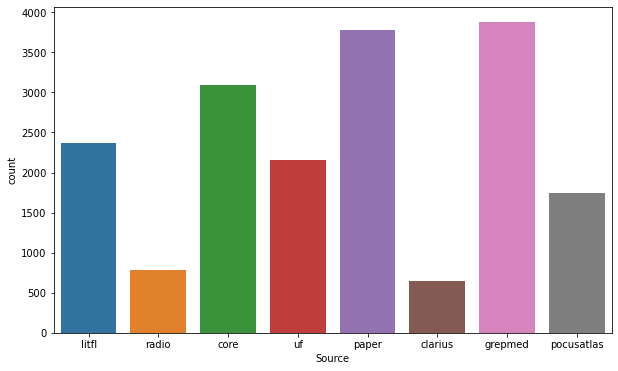

In [20]:
plt.rcParams["figure.figsize"] = (10,6)
sns.countplot(x ='Source', data = df_clean)
plt.show()

In [21]:
df_clean['Probe_Type'].unique()

array(['convex', 'linear'], dtype=object)

### Probe_Type Variable 

#### Unique
- There are total of 2 unique Probe types which includes ['convex', 'linear'].
- All the types are in string format.
- Each Probe type has various distributions which are clearly shown in the below plot and above report.

#### Consistency
- Data contributions is very different for every source.
    - Value	Count	Frequency (%)
    - convex	14059	76.2%
    - linear	4389	 23.8% 

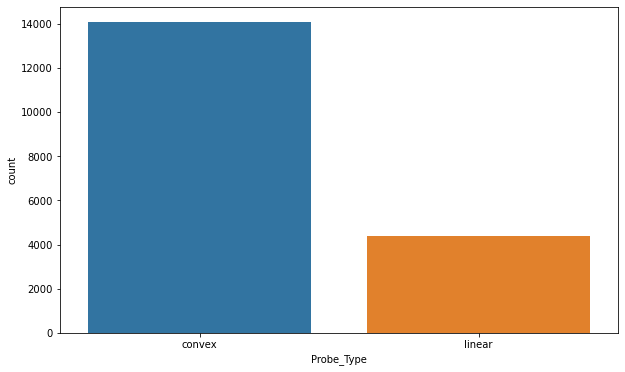

In [22]:
sns.countplot(x ='Probe_Type', data = df_clean)
plt.show()

In [23]:
df_clean['Catogery'].unique()

array(['other', 'pneumonia', 'normal', 'covid'], dtype=object)

### Category Variable 

#### Unique
- There are total of 4 unique Categories which includes ['other', 'pneumonia', 'normal', 'covid'].
- All the Categories are in string format.
- Each Category has various distributions which are clearly shown in the below plot and above report.
- There is slight imbalnce with the data labels.
- Labels with Pneumonia and Covid are quiet equal compared to Normal and other.


#### Consistency
- Data contributions is very different for every source.
    - Value	Count	Frequency (%)
    - other	7944	43.1%
    - pneumonia	4300	23.3%
    - covid	4003	21.7%
    - normal	2201	 11.9%

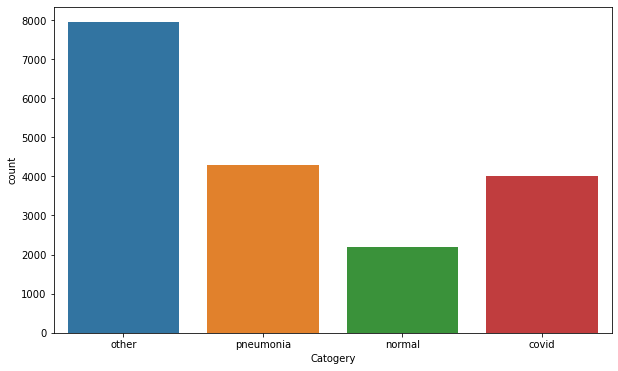

In [24]:
sns.countplot(x ='Catogery', data = df_clean)
plt.show()

In [25]:

#crop = load_images_from_folder_('data\image\cropped')


100% (18448 of 18448) |##################| Elapsed Time: 0:01:26 Time:  0:01:26


In [26]:

r=[]
c=[]
rgb=[]
for i in crop:
    r.append(i.shape[0])
    c.append(i.shape[1])
    rgb.append(i.shape[2])

list_of_tuples = list(zip(r,c,rgb))


crop_shape = pd.DataFrame(list_of_tuples, columns=['Rows', 'Columns','Channels'])
del r,c,rgb,list_of_tuples

In [27]:
crop_shape.describe()

,Rows,Columns,Channels
count,18448.000000,18448.000000,18448.0
mean,509.784475,529.793799,3.0
std,143.652096,223.849430,0.0
min,196.000000,140.000000,3.0
25%,386.000000,360.000000,3.0
50%,512.000000,512.000000,3.0
75%,600.000000,600.000000,3.0
max,900.000000,1276.000000,3.0


In [28]:
print("Memory size of a Cropped image array is :",crop.nbytes)

Memory size of a Cropped image array is : 147584


## Data Fitness

- After cropping the data we have 18448 data images which are sufficent enough.
- In this data there is slight imbalance with the Class labels but we can adjust that with either upscaling or giving more weight to least class labels.
#### We can answer to all the reseach questions as the data is good and has all the necessasry things to work with. 

# Data Science Ethics Checklist

[![Deon badge](https://img.shields.io/badge/ethics%20checklist-deon-brightgreen.svg?style=popout-square)](http://deon.drivendata.org/)

## A. Data Collection
 - [ ] **A.1 Informed consent**: If there are human subjects, have they given informed consent, where subjects affirmatively opt-in and have a clear understanding of the data uses to which they consent?
 - [ ] **A.2 Collection bias**: Have we considered sources of bias that could be introduced during data collection and survey design and taken steps to mitigate those?
 - [ ] **A.3 Limit PII exposure**: Have we considered ways to minimize exposure of personally identifiable information (PII) for example through anonymization or not collecting information that isn't relevant for analysis?
 - [ ] **A.4 Downstream bias mitigation**: Have we considered ways to enable testing downstream results for biased outcomes (e.g., collecting data on protected group status like race or gender)?

## B. Data Storage
 - [ ] **B.1 Data security**: Do we have a plan to protect and secure data (e.g., encryption at rest and in transit, access controls on internal users and third parties, access logs, and up-to-date software)?
 - [ ] **B.2 Right to be forgotten**: Do we have a mechanism through which an individual can request their personal information be removed?
 - [ ] **B.3 Data retention plan**: Is there a schedule or plan to delete the data after it is no longer needed?

## C. Analysis
 - [ ] **C.1 Missing perspectives**: Have we sought to address blindspots in the analysis through engagement with relevant stakeholders (e.g., checking assumptions and discussing implications with affected communities and subject matter experts)?
 - [ ] **C.2 Dataset bias**: Have we examined the data for possible sources of bias and taken steps to mitigate or address these biases (e.g., stereotype perpetuation, confirmation bias, imbalanced classes, or omitted confounding variables)?
 - [ ] **C.3 Honest representation**: Are our visualizations, summary statistics, and reports designed to honestly represent the underlying data?
 - [ ] **C.4 Privacy in analysis**: Have we ensured that data with PII are not used or displayed unless necessary for the analysis?
 - [ ] **C.5 Auditability**: Is the process of generating the analysis well documented and reproducible if we discover issues in the future?

## D. Modeling
 - [ ] **D.1 Proxy discrimination**: Have we ensured that the model does not rely on variables or proxies for variables that are unfairly discriminatory?
 - [ ] **D.2 Fairness across groups**: Have we tested model results for fairness with respect to different affected groups (e.g., tested for disparate error rates)?
 - [ ] **D.3 Metric selection**: Have we considered the effects of optimizing for our defined metrics and considered additional metrics?
 - [ ] **D.4 Explainability**: Can we explain in understandable terms a decision the model made in cases where a justification is needed?
 - [ ] **D.5 Communicate bias**: Have we communicated the shortcomings, limitations, and biases of the model to relevant stakeholders in ways that can be generally understood?

## E. Deployment
 - [ ] **E.1 Redress**: Have we discussed with our organization a plan for response if users are harmed by the results (e.g., how does the data science team evaluate these cases and update analysis and models to prevent future harm)?
 - [ ] **E.2 Roll back**: Is there a way to turn off or roll back the model in production if necessary?
 - [ ] **E.3 Concept drift**: Do we test and monitor for concept drift to ensure the model remains fair over time?
 - [ ] **E.4 Unintended use**: Have we taken steps to identify and prevent unintended uses and abuse of the model and do we have a plan to monitor these once the model is deployed?

*Data Science Ethics Checklist generated with [deon](http://deon.drivendata.org).*


## Git link

<a href="https://github.com/Noorjahan-Shaik/Capstone_Project.git">GIT LINK</a>